Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/01_Collaborative_Filtering'
except ImportError as e:
    pass

# **Exercise 1: Recommender Systems - Collaborative Filtering**

Collaborative filtering is a technique used in recommendation systems to predict a user's preference for a particular item based on the preferences of other similar users.

The idea behind collaborative filtering is that if two users have similar preferences for a set of items, they are likely to have similar preferences for other items as well. Similarly, if two items have been rated highly by the same set of users, they are likely to be similar in some way and may be recommended to users who have shown an interest in one of the items.

Collaborative filtering algorithms can be based on either user-based or item-based methods. User-based collaborative filtering recommends items to a user based on the preferences of other users who are similar to them, while item-based collaborative filtering recommends items that are similar to the items a user has previously liked or rated highly.

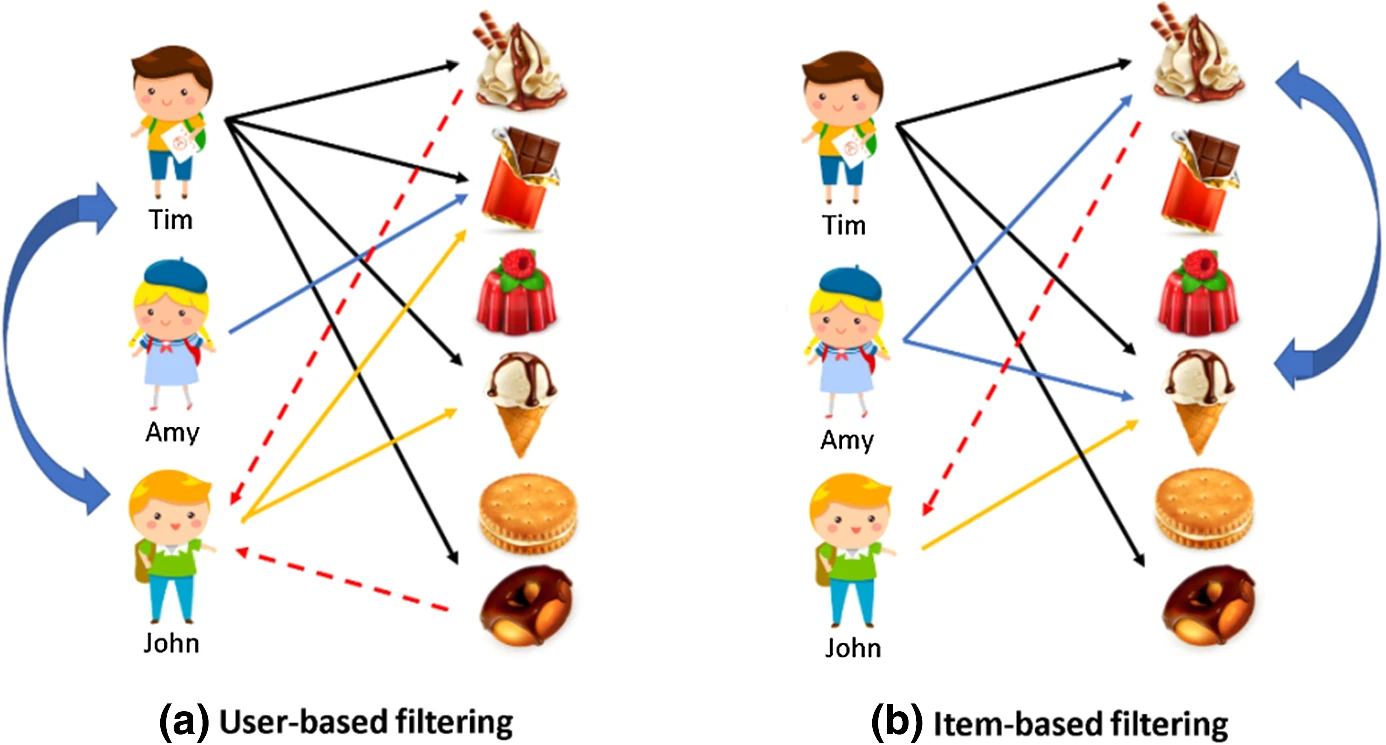
[Source: A collaborative filtering recommendation system with dynamic time decay](https://doi.org/10.1007/s11227-020-03266-2)

# **The surprise library**

[Surprise](https://surpriselib.com/) is a Python [scikit](https://projects.scipy.org/scikits.html) for building and analyzing recommender systems that deal with explicit rating data.

The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.

In [1]:
# Install the surprise package
!conda install -c conda-forge scikit-surprise

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [78 lines of output]
  C:\Users\pc\Anaconda3\lib\site-packages\setuptools\dist.py:774: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    % (opt, underscore_opt)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-37
  creating build\lib.win-amd64-cpython-37\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-37\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-37\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-37\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-37\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-37\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-37\surprise


**MovieLens**

The dataset [**MovieLens-100k**](https://grouplens.org/datasets/movielens/) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. 
It contains:
- 100,836 ratings
- 3,683 tag applications 
- 9,742 movies
- 610 users

These data were created between March 29, 1996 and September 24, 2018.

In [1]:
from surprise import Dataset

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Retrieve the trainset.
trainset = data.build_full_trainset()

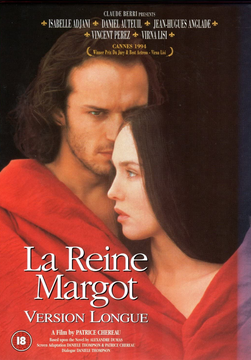

We are interested in the rating of user 196 for the movie "Queen Margot" with the id 302

In [2]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item(movie) id (as in the ratings file). They are **strings**!

**[Similarity measure configuration](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration)**

Many algorithms use a similarity measure to estimate a rating. The way they can be configured is done in a similar fashion as for baseline ratings: you just need to pass a `sim_options` argument at the creation of an algorithm. This argument is a dictionary with the following (all optional) keys:

 `name`: The name of the similarity to use, as defined in the similarities module. Options from the lecture: `pearson` and `cosine`. Default is `MSD`.

 `user_based`: Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.

  `min_support`: The minimum number of common items (when `user_based` is `True`) or minimum number of common users (when `user_based` is `False`) for the similarity not to be zero.

In [3]:
# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': True, 'min_support': 1}

**[KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic)** is a basic collaborative filtering algorithm for the simple prediction.

The prediction is set as:

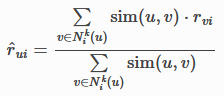

or

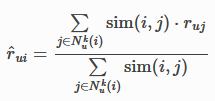

depending on the `user_based` field of the `sim_options` parameter.

In [5]:
from surprise import KNNBasic
# User-based with Pearson correlation similarity and simple prediction

# Build algorithm
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 3.93   {'actual_k': 40, 'was_impossible': False}


[KNNWithMeans](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic) is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

The prediction is set as:
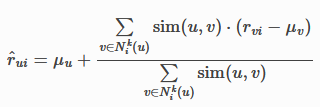

or
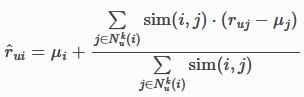

depending on the `user_based` field of the `sim_options` parameter.

In [6]:
from surprise import KNNWithMeans
# User-based with Pearson correlation similarity and adjusted prediction considering the rating behaviour

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': True, 'min_support': 1}
algo = KNNWithMeans(sim_options=sim_options)
algo.fit(trainset)

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 4.03   {'actual_k': 40, 'was_impossible': False}


In [7]:
# Item-based with Cosine similarity and simple prediction

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'cosine', 'user_based': False, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 3.61   {'actual_k': 39, 'was_impossible': False}


In [8]:
# Item-based with Pearson (Adjusted Cosine) similarity and simple prediction

# Define a custom similarity function for the KNNBasic algorithm
sim_options = {'name': 'pearson', 'user_based': False, 'min_support': 1}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
user: 196        item: 302        r_ui = 4.00   est = 3.24   {'actual_k': 30, 'was_impossible': False}
